In [26]:
import pandas as pd
import math
import quantstats as qs 
import matplotlib.pyplot as plt
import numpy as np
from datetime import date



In [27]:
#pegando os dados de fechamento
dataframe = pd.read_csv('close.csv')
dataframe

Data Fechamento\r\najust p/ prov\r\nEm moeda orig\r\nRRRP3  \
0     02/01/1986                                                  -      
1     03/01/1986                                                  -      
2     06/01/1986                                                  -      
3     07/01/1986                                                  -      
4     08/01/1986                                                  -      
...          ...                                                ...      
9610  03/11/2022                                              47.88      
9611  04/11/2022                                              51.31      
9612  07/11/2022                                              48.76      
9613  08/11/2022                                                 47      
9614  09/11/2022                                              46.21      

     Fechamento\r\najust p/ prov\r\nEm moeda orig\r\nTTEN3  \
0                                                     -      
1                                                     -      
2                                                     -      
3                                                     -      
4                                                     -      
...                                                 ...      
9610                                              12.96      
9611                                              13.52      
9612                                              12.74      
9613                                              12.13      
9614                                                 12      

     Fechamento\r\najust p/ prov\r\nEm moeda orig\r\nQVUM3B  \
0                                                     -       
1                                                     -       
2                                                     -       
3                                                     -       
4                                                     -       
...                                                 ...       
9610                                                  -       
9611                                                  -       
9612                                                  -       
9613                                                  -       
9614                                                  -       

     Fechamento\r\najust p/ prov\r\nEm moeda orig\r\nQVQP3B  \
0                                                     -       
1                                                     -       
2                                                     -       
3                                                     -       
4                                                     -       
...                                                 ...       
9610                                                  -       
9611                                                  -       
9612                                                  -       
9613                                                  -       
9614                                                  -       

     Fechamento\r\najust p/ prov\r\nEm moeda orig\r\nAPPA3  \
0                                                     -      
1                                                     -      
2                                                     -      
3                                                     -      
4                                                     -      
...                                                 ...      
9610                                                  -      
9611                                                  -      
9612                                                  -      
9613                                                  -      
9614                                                  -      

     Fechamento\r\najust p/ prov\r\nEm moeda orig\r\nAPPA4  \
0                                                     -  

In [28]:
#A base de fechamento anterior estava com alguns problemas, então baixei uma novao no economática
dataframe = pd.read_csv('economatica.csv')
#agora pegando a base do indice de negociaçao para nosso universo ibx
df_ineg = pd.read_csv('ineg.csv')
df_ineg = df_ineg.loc[:9614,:]
df_ineg
dataframe


Data Fechamento\r\najust p/ prov\r\nEm moeda orig\r\nRRRP3  \
0     02/01/1986                                                  -      
1     03/01/1986                                                  -      
2     06/01/1986                                                  -      
3     07/01/1986                                                  -      
4     08/01/1986                                                  -      
...          ...                                                ...      
9610  03/11/2022                                              47.88      
9611  04/11/2022                                              51.31      
9612  07/11/2022                                              48.76      
9613  08/11/2022                                                 47      
9614  09/11/2022                                              46.21      

     Fechamento\r\najust p/ prov\r\nEm moeda orig\r\nTTEN3  \
0                                                     -      
1                                                     -      
2                                                     -      
3                                                     -      
4                                                     -      
...                                                 ...      
9610                                              12.96      
9611                                              13.52      
9612                                              12.74      
9613                                              12.13      
9614                                                 12      

     Fechamento\r\najust p/ prov\r\nEm moeda orig\r\nQVUM3B  \
0                                                     -       
1                                                     -       
2                                                     -       
3                                                     -       
4                                                     -       
...                                                 ...       
9610                                                  -       
9611                                                  -       
9612                                                  -       
9613                                                  -       
9614                                                  -       

     Fechamento\r\najust p/ prov\r\nEm moeda orig\r\nQVQP3B  \
0                                                     -       
1                                                     -       
2                                                     -       
3                                                     -       
4                                                     -       
...                                                 ...       
9610                                                  -       
9611                                                  -       
9612                                                  -       
9613                                                  -       
9614                                                  -       

     Fechamento\r\najust p/ prov\r\nEm moeda orig\r\nAPPA3  \
0                                                     -      
1                                                     -      
2                                                     -      
3                                                     -      
4                                                     -      
...                                                 ...      
9610                                                  -      
9611                                                  -      
9612                                                  -      
9613                                                  -      
9614                                                  -      

     Fechamento\r\najust p/ prov\r\nEm moeda orig\r\nAPPA4  \
0                                                     -  

In [29]:
#pegando a base do market cap para o size
mktcap = pd.read_csv('mktcap.csv', sep = ";")
mktcap

Data Valor Mercado\nda empresa\nEm moeda orig\nem milhares\nRRRP3  \
0     01/01/2002                                                  -             
1     02/01/2002                                                  -             
2     03/01/2002                                                  -             
3     04/01/2002                                                  -             
4     07/01/2002                                                  -             
...          ...                                                ...             
5436  02/11/2022                                       9.532.004,00             
5437  03/11/2022                                       9.700.157,00             
5438  04/11/2022                                      10.395.051,00             
5439  07/11/2022                                       9.878.438,00             
5440  08/11/2022                                       9.521.875,00             

     Valor Mercado\nda empresa\nEm moeda orig\nem milhares\nTTEN3  \
0                                                     -             
1                                                     -             
2                                                     -             
3                                                     -             
4                                                     -             
...                                                 ...             
5436                                       6.430.985,00             
5437                                       6.430.985,00             
5438                                       6.708.867,00             
5439                                       6.321.817,00             
5440                                       6.019.124,00             

     Valor Mercado\nda empresa\nEm moeda orig\nem milhares\nQVQP3B  \
0                                                     -              
1                                                     -              
2                                                     -              
3                                                     -              
4                                                     -              
...                                                 ...              
5436                                                  -              
5437                                                  -              
5438                                                  -              
5439                                                  -              
5440                                                  -              

     Valor Mercado\nda empresa\nEm moeda orig\nem milhares\nABCB4  \
0                                                     -             
1                                                     -             
2                                                     -             
3                                                     -             
4                                                     -             
...                                                 ...             
5436                                       4.781.095,00             
5437                                       4.750.178,00             
5438                                       4.816.429,00             
5439                                       4.648.594,00             
5440                                       4.747.970,00             

     Valor Mercado\nda empresa\nEm moeda orig\nem milhares\nEALT3  \
0                                                     -             
1                                                     -             
2                                                     -             
3                                                     -             
4                                                     -             
...                                                 ...             
5436                                         187.380,00  

In [30]:
#criei uma funçao para limpar minhas algumas das minhas bases
def limpa_base(dataframe, s):
    linha =0
    for data in dataframe.Data:
        ano = int(data[6:])
        if ano == 2010:
            break
        linha+=1
    dataframe = dataframe.loc[linha:,:]
    if s == 0:
        dataframe.columns = dataframe.columns.str.replace("Fechamento\r\najust p/ prov\r\nEm moeda orig\r\n", "")
    else:
        if s == 1:
            dataframe.columns = dataframe.columns.str.replace("Negociabilidade\n1 meses\nEm moeda orig\n", "")
        else: 
            dataframe.columns = dataframe.columns.str.replace("ROIC (IC fim) %\n de 12 meses\n consolid:sim*\n", "")
    datas = dataframe.Data
    dataframe = dataframe.loc[:,"RRRP3":].replace('-', np.nan)
    dataframe = dataframe.apply(pd.to_numeric)
    dataframe.insert(0, "Datas", datas)
    tickers = [col for col in dataframe.columns if col != 'Data']
    #dataframe = dataframe.dropna(axis=0, how='all', subset=tickers)
    return dataframe

dataframe = limpa_base(dataframe,0)
df_ineg = limpa_base(df_ineg,1)
dataframe.tail(3)

Datas  RRRP3  TTEN3  QVUM3B  QVQP3B  APPA3  APPA4  ABCB3  ABCB4  \
9612  07/11/2022  48.76  12.74     NaN     NaN    NaN    NaN    NaN  21.05   
9613  08/11/2022  47.00  12.13     NaN     NaN    NaN    NaN    NaN  21.50   
9614  09/11/2022  46.21  12.00     NaN     NaN    NaN    NaN    NaN  21.09   

      ABCB11  ...  WWOW3  ILMD3  ILMD4  YBRA3B  YDUQ3  ESTC4  ESTC11  OPZI3B  \
9612     NaN  ...    NaN    NaN    NaN     NaN  14.61    NaN     NaN     NaN   
9613     NaN  ...    NaN    NaN    NaN     NaN  13.98    NaN     NaN     NaN   
9614     NaN  ...    NaN    NaN    NaN     NaN  13.72    NaN     NaN     NaN   

      ZAMP3  ZIVI4  
9612    7.0    NaN  
9613    7.1    NaN  
9614    7.3    NaN  

[3 rows x 1400 columns]

In [31]:
#   como o pandas nao conseguiu ler minha base de market cap automaticamente, precisei especificar o separador no 
# arquivo csv, o que acarretou um problema para limpar essa base com minha funçao anterior. Entao limpei semparadamente
# essa base
lista_c = []
for c in mktcap.columns:
    c = c.replace("Valor Mercado\nda empresa\nEm moeda orig\nem milhares\n", "")
    lista_c.append(c)
    
mktcap.columns = lista_c
mktcap

Data          RRRP3         TTEN3 QVQP3B         ABCB4  \
0     01/01/2002              -             -      -             -   
1     02/01/2002              -             -      -             -   
2     03/01/2002              -             -      -             -   
3     04/01/2002              -             -      -             -   
4     07/01/2002              -             -      -             -   
...          ...            ...           ...    ...           ...   
5436  02/11/2022   9.532.004,00  6.430.985,00      -  4.781.095,00   
5437  03/11/2022   9.700.157,00  6.430.985,00      -  4.750.178,00   
5438  04/11/2022  10.395.051,00  6.708.867,00      -  4.816.429,00   
5439  07/11/2022   9.878.438,00  6.321.817,00      -  4.648.594,00   
5440  08/11/2022   9.521.875,00  6.019.124,00      -  4.747.970,00   

           EALT3       EALT4         AERI3         AESB3 AESO3  ...  \
0              -           -             -             -     -  ...   
1              -           -             -             -     -  ...   
2              -           -             -             -     -  ...   
3              -           -             -             -     -  ...   
4              -           -             -             -     -  ...   
...          ...         ...           ...           ...   ...  ...   
5436  187.380,00  187.380,00  1.425.973,00  5.939.163,00     -  ...   
5437  192.488,00  192.488,00  1.479.352,00  5.999.034,00     -  ...   
5438  189.173,00  189.173,00  1.525.105,00  6.232.529,00     -  ...   
5439  175.665,00  175.665,00  1.486.977,00  5.891.266,00     -  ...   
5440  172.860,00  172.860,00  1.517.479,00  5.915.215,00     -  ...   

          MWET4         WHRL3         WHRL4         PORT3         WIZS3  \
0     16.121,00    792.898,00    792.898,00             -             -   
1     16.121,00    792.898,00    792.898,00             -             -   
2     16.807,00    787.123,00    787.123,00             -             -   
3     16.807,00    787.123,00    787.123,00             -             -   
4     16.807,00    787.123,00    787.123,00             -             -   
...         ...           ...           ...           ...           ...   
5436  34.787,00  7.838.009,00  7.838.009,00  5.015.642,00  1.266.466,00   
5437  34.911,00  7.826.112,00  7.826.112,00  5.020.042,00  1.271.263,00   
5438  34.979,00  7.968.519,00  7.968.519,00  5.081.637,00  1.277.659,00   
5439  34.403,00  7.917.981,00  7.917.981,00  4.998.043,00  1.261.668,00   
5440  34.815,00  7.888.639,00  7.888.639,00  5.011.242,00  1.258.470,00   

           WLMM3       WLMM4 YBRA3B         YDUQ3         ZAMP3  
0      60.617,00   60.617,00      -             -             -  
1      60.617,00   60.617,00      -             -             -  
2      58.394,00   58.394,00      -             -             -  
3      57.601,00   57.601,00      -             -             -  
4      57.601,00   57.601,00      -             -             -  
...          ...         ...    ...           ...           ...  
5436  886.260,00  886.260,00      -  4.850.277,00  2.029.683,00  
5437  862.448,00  862.448,00      -  4.741.116,00  1.967.687,00  
5438  863.043,00  863.043,00      -  4.823.724,00  2.000.033,00  
5439  862.051,00  862.051,00      -  4.310.374,00  1.886.823,00  
5440  864.631,00  864.631,00      -  4.124.505,00  1.913.778,00  

[5441 rows x 571 columns]

In [32]:
#pegando apenas 2010 para frente
linha =0
for data in mktcap.Data:
    ano = int(data[6:])
    if ano == 2010:
        break
    linha+=1
mktcap = mktcap.loc[linha:,:]
mktcap

Data          RRRP3         TTEN3 QVQP3B         ABCB4  \
2088  01/01/2010              -             -      -  1.569.048,00   
2089  04/01/2010              -             -      -  1.660.475,00   
2090  05/01/2010              -             -      -  1.704.844,00   
2091  06/01/2010              -             -      -  1.733.079,00   
2092  07/01/2010              -             -      -  1.707.533,00   
...          ...            ...           ...    ...           ...   
5436  02/11/2022   9.532.004,00  6.430.985,00      -  4.781.095,00   
5437  03/11/2022   9.700.157,00  6.430.985,00      -  4.750.178,00   
5438  04/11/2022  10.395.051,00  6.708.867,00      -  4.816.429,00   
5439  07/11/2022   9.878.438,00  6.321.817,00      -  4.648.594,00   
5440  08/11/2022   9.521.875,00  6.019.124,00      -  4.747.970,00   

           EALT3       EALT4         AERI3         AESB3 AESO3  ...  \
2088   75.825,00   75.825,00             -             -     -  ...   
2089   75.375,00   75.375,00             -             -     -  ...   
2090   73.125,00   73.125,00             -             -     -  ...   
2091   73.013,00   73.013,00             -             -     -  ...   
2092   73.350,00   73.350,00             -             -     -  ...   
...          ...         ...           ...           ...   ...  ...   
5436  187.380,00  187.380,00  1.425.973,00  5.939.163,00     -  ...   
5437  192.488,00  192.488,00  1.479.352,00  5.999.034,00     -  ...   
5438  189.173,00  189.173,00  1.525.105,00  6.232.529,00     -  ...   
5439  175.665,00  175.665,00  1.486.977,00  5.891.266,00     -  ...   
5440  172.860,00  172.860,00  1.517.479,00  5.915.215,00     -  ...   

          MWET4         WHRL3         WHRL4         PORT3         WIZS3  \
2088  66.834,00  5.255.010,00  5.255.010,00  1.528.173,00             -   
2089  63.284,00  5.269.233,00  5.269.233,00  1.526.039,00             -   
2090  62.255,00  5.255.010,00  5.255.010,00  1.525.327,00             -   
2091  61.791,00  5.231.306,00  5.231.306,00  1.572.994,00             -   
2092  62.255,00  5.226.565,00  5.226.565,00  1.593.626,00             -   
...         ...           ...           ...           ...           ...   
5436  34.787,00  7.838.009,00  7.838.009,00  5.015.642,00  1.266.466,00   
5437  34.911,00  7.826.112,00  7.826.112,00  5.020.042,00  1.271.263,00   
5438  34.979,00  7.968.519,00  7.968.519,00  5.081.637,00  1.277.659,00   
5439  34.403,00  7.917.981,00  7.917.981,00  4.998.043,00  1.261.668,00   
5440  34.815,00  7.888.639,00  7.888.639,00  5.011.242,00  1.258.470,00   

           WLMM3       WLMM4 YBRA3B         YDUQ3         ZAMP3  
2088  305.883,00  305.883,00      -  1.948.908,00             -  
2089  287.676,00  287.676,00      -  1.902.543,00             -  
2090  291.317,00  291.317,00      -  1.925.333,00             -  
2091  298.600,00  298.600,00      -  1.956.767,00             -  
2092  299.693,00  299.693,00      -  1.925.333,00             -  
...          ...         ...    ...           ...           ...  
5436  886.260,00  886.260,00      -  4.850.277,00  2.029.683,00  
5437  862.448,00  862.448,00      -  4.741.116,00  1.967.687,00  
5438  863.043,00  863.043,00      -  4.823.724,00  2.000.033,00  
5439  862.051,00  862.051,00      -  4.310.374,00  1.886.823,00  
5440  864.631,00  864.631,00      -  4.124.505,00  1.913.778,00  

[3353 rows x 571 columns]

In [33]:
import warnings
warnings.filterwarnings('ignore')
#o codigo anterior foi para parar com um aviso do jupyter

#mudando as datas para o tipo padrao do pandas e especificando que o dia vem primeiro na minha base original
df_ineg.Datas = pd.to_datetime(df_ineg.Datas, dayfirst=True)
dataframe.Datas = pd.to_datetime(dataframe.Datas, dayfirst=True)
dataframe.head(50)

Datas  RRRP3  TTEN3  QVUM3B  QVQP3B  APPA3  APPA4  ABCB3     ABCB4  \
6261 2010-01-01    NaN    NaN     NaN     NaN    NaN    NaN    NaN       NaN   
6262 2010-01-04    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.229723   
6263 2010-01-05    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.369464   
6264 2010-01-06    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.458391   
6265 2010-01-07    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.377934   
6266 2010-01-08    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.335588   
6267 2010-01-11    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.437218   
6268 2010-01-12    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.335588   
6269 2010-01-13    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.208550   
6270 2010-01-14    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.314415   
6271 2010-01-15    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.420279   
6272 2010-01-18    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.432983   
6273 2010-01-19    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.441452   
6274 2010-01-20    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.432983   
6275 2010-01-21    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.441452   
6276 2010-01-22    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.314415   
6277 2010-01-25    NaN    NaN     NaN     NaN    NaN    NaN    NaN       NaN   
6278 2010-01-26    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.208550   
6279 2010-01-27    NaN    NaN     NaN     NaN    NaN    NaN    NaN  4.996820   
6280 2010-01-28    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.030697   
6281 2010-01-29    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.123858   
6282 2010-02-01    NaN    NaN     NaN     NaN    NaN    NaN    NaN  4.933301   
6283 2010-02-02    NaN    NaN     NaN     NaN    NaN    NaN    NaN  4.975647   
6284 2010-02-03    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.030697   
6285 2010-02-04    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.081512   
6286 2010-02-05    NaN    NaN     NaN     NaN    NaN    NaN    NaN  4.763917   
6287 2010-02-08    NaN    NaN     NaN     NaN    NaN    NaN    NaN  4.759683   
6288 2010-02-09    NaN    NaN     NaN     NaN    NaN    NaN    NaN  4.920597   
6289 2010-02-10    NaN    NaN     NaN     NaN    NaN    NaN    NaN  4.827436   
6290 2010-02-11    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.056104   
6291 2010-02-12    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.043401   
6292 2010-02-15    NaN    NaN     NaN     NaN    NaN    NaN    NaN       NaN   
6293 2010-02-16    NaN    NaN     NaN     NaN    NaN    NaN    NaN       NaN   
6294 2010-02-17    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.145031   
6295 2010-02-18    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.123858   
6296 2010-02-19    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.039166   
6297 2010-02-22    NaN    NaN     NaN     NaN    NaN    NaN    NaN  4.958709   
6298 2010-02-23    NaN    NaN     NaN     NaN    NaN    NaN    NaN  4.869782   
6299 2010-02-24    NaN    NaN     NaN     NaN    NaN    NaN    NaN  4.996820   
6300 2010-02-25    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.123858   
6301 2010-02-26    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.208550   
6302 2010-03-01    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.293242   
6303 2010-03-02    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.293242   
6304 2010-03-03    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.297476   
6305 2010-03-04    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.297476   
6306 2010-03-05    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.437218   
6307 2010-03-08    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.517675   
6308 2010-03-09    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.589663   
6309 2010-03-10    NaN    NaN     NaN     NaN    NaN    NaN    NaN  5.585429   
6310 2010-

In [34]:
#criando uma funçao que devolve meu universo (nesse caso as 100 açoes mais liquidas da bolsa) no ultimo mes
def Universo(ineg, dataF):
    data_analise = dataF - pd.DateOffset(months=1)
    ineg_mes_passado = df_ineg[(df_ineg.Datas>=pd.Timestamp(data_analise))&(df_ineg.Datas<=pd.Timestamp(dataF))]
    
    universo = ineg_mes_passado.iloc[-1]
    universo = universo.dropna()
    universo=pd.DataFrame(universo)
    universo = universo[2:].sort_values(by=universo.columns[0],ascending = False)
    
    return universo.iloc[:100].index

Universo(df_ineg,date(2010,2,1))

Index(['VALE5', 'PETR4', 'OGXP3', 'ITUB4', 'B3SA3', 'GGBR4', 'MILK33', 'PETR3',
       'BBDC4', 'VALE3', 'USIM5', 'LAND3', 'CSNA3', 'BBAS3', 'CYRE3', 'ITSA4',
       'PDGR3', 'ELET3', 'TELB4', 'ALLL11', 'BRFS3', 'MMXM3', 'CIEL3', 'CMIG4',
       'RDCD3', 'FIBR3', 'KEPL3', 'CSAN3', 'MRVE3', 'GFSA3', 'ELET6', 'GOLL4',
       'RSID3', 'JBSS3', 'NETC4', 'LAME4', 'LREN3', 'TAMM4', 'PCAR4', 'PRML3',
       'AMER3', 'BRML3', 'CCRO3', 'AMBV4', 'BRAP4', 'CESP6', 'TNLP4', 'VIVO4',
       'NTCO3', 'TCSL4', 'GOAU4', 'AGEN33', 'DXCO3', 'LIGT3', 'MRFG3',
       'SANB11', 'EMBR3', 'ELPL4', 'PLAS3', 'BISA3', 'AGIN3', 'RPMG3', 'CPLE6',
       'BRKM5', 'HYPE3', 'UGPA4', 'EGIE3', 'SUZB5', 'FFTL4', 'OIBR4', 'CPFE3',
       'CSMG3', 'RENT3', 'USIM3', 'SBSP3', 'CRUZ3', 'DUFB11', 'ENBR3', 'KLBN4',
       'GETI4', 'RPMG4', 'BRSR6', 'TRPL4', 'GVTT3', 'TNLP3', 'DASA3', 'MULT3',
       'TEND3-old', 'VIVR3', 'PMAM3', 'CTIP3', 'ABYA3', 'MYPK3', 'TMAR5',
       'LUPA3', 'AEDU11', 'BLUT4', 'BEEF3', 'RAPT4', 'ENEV3']

In [35]:
#criando uma funçao que calcula a volatilidade das açoes
def volatilidade(dataF):
    dataframe.Datas = pd.to_datetime(dataframe.Datas)
    data_analise = dataF - pd.DateOffset(months=1)

    p = dataframe[(dataframe.Datas>=pd.Timestamp(data_analise))&(dataframe.Datas<=pd.Timestamp(dataF))].count()  
    
    filtros_aplicados = dataframe[
                (dataframe.Datas>=pd.Timestamp(data_analise))&(dataframe.Datas<=pd.Timestamp(dataF))
            ]

    dtfr = pd.DataFrame(
        data={
            "sigma": filtros_aplicados.set_index('Datas').pct_change().std()
        }
    )
    
    universo = Universo(df_ineg, dataF)
    dtfr = dtfr.loc[universo,:]
    return dtfr

volatilidade(date(2010,2,1)).sort_values(by='sigma')#.head(20).index

sigma
GVTT3   0.003069
EGIE3   0.007570
TRPL4   0.008662
UGPA4   0.009358
CPFE3   0.011326
...          ...
MILK33  0.122618
KEPL3   0.153286
RPMG4   0.164462
RPMG3   0.164678
BLUT4   0.175306

[100 rows x 1 columns]

In [36]:
#celula que usei para testar alguns codigos e mudar a data no arquivo mktcap

#dataframe[(dataframe.Datas>=pd.Timestamp(date(2010,1,1)))&(dataframe.Datas<=pd.Timestamp(date(2010,2,1)))]
mktcap.Data = pd.to_datetime(mktcap.Data, dayfirst=True)
mktcap.Data = pd.to_datetime(mktcap.Data)
#roic[(roic.Data>=pd.Timestamp(date(2010,1,1)))&(roic.Data<=pd.Timestamp(date(2010,2,1)))]  
mktcap_test = mktcap[(mktcap.Data>=pd.Timestamp(date(2010, 1,1)))&(mktcap.Data<=pd.Timestamp(date(2010, 2,1)))]  



In [37]:
#funçao que devolve as açoes com menores size, sendo o univreso aqui o low-vol. Sequential low-vol -> size
def size(dataFINAL):
    da = dataFINAL - pd.DateOffset(months=1)
    lv = volatilidade(dataFINAL).sort_values(by='sigma').head(30).index

    m = mktcap[(mktcap.Data>=pd.Timestamp(da))&(mktcap.Data<=pd.Timestamp(dataFINAL))] 
    m2 = mktcap[(mktcap.Data==pd.Timestamp(dataFINAL)-pd.DateOffset(days=0))]
    #pegar o ultimo dia que saiu o market cap
    data_loop = dataFINAL
    x_days = 1
    while m2.count()[0] == 0:
        m2 = mktcap[(mktcap.Data==pd.Timestamp(dataFINAL)-pd.DateOffset(days=x_days))]
        x_days+=1
        if m2.count()[0] == 1:
            break
    novo_lv = []

    for t in lv:
        b = t in m.columns
        if b == True:
            novo_lv.append(t)
    
    #vamos ordenar novo_lv
    for T in m2.columns:
        if T not in novo_lv:
            m2 = m2.drop(columns=[T])
        
    m2_transposto = m2.transpose()
    names = m2_transposto.columns.tolist()
    names[names.index(m2_transposto.columns[0])] = 'Market cap'
    m2_transposto.columns = names
    
    #mudar tipo de numero
    lista_mktcap = []
    for n in m2_transposto["Market cap"]:
        novo_n = ""
        for each in n:
            if each == ".":
                novo_n+=""
            elif each == ",":
                novo_n+="."
            else:
                novo_n+=each
        novo_n = float(novo_n)

        lista_mktcap.append(novo_n)
    m2_transposto["Market cap"] = lista_mktcap    
    
    return m2_transposto


exemplo = size(date(2019, 12,2))
exemplo.sort_values(by = "Market cap")

Market cap
LIGT3     6291435.0
ODPV3     8302005.0
CSMG3     8594792.0
TAEE11    9812304.0
BRAP4    11753817.0
ENBR3    11963063.0
EMBR3    13577724.0
TRPL4    15243452.0
ENGI11   18013810.0
CMIG4    19712378.0
EQTL3    20792838.0
HYPE3    21176920.0
SULA11   22777231.0
NEOE3    25853876.0
VBBR3    33388900.0
RADL3    36259865.0
CPFE3    36411240.0
EGIE3    38226215.0
ELET6    47786377.0
ITSA4   112773066.0
BBAS3   132200000.0
SANB11  165831513.0
BBDC4   261633554.0
BBDC3   261633554.0
VALE3   263286050.0
ABEV3   282671856.0
ITUB4   319476291.0
PETR3   394749186.0

In [42]:
#eu estava tendo alguns problemas com as datas entao criei essa funçao para ver se o dia estava na base
def dia_existe(dia, DF):
    v_f = dia in DF.Datas
    #print(f"{v_f}   TESTANDO")
    if v_f == False:
        dia = dia + pd.DateOffset(days=1)
        v_f = dia in DF.Datas
    
    return dia

data = date(2010,1,1)
print(data in dataframe)
data = dia_existe(data, dataframe)
#print(data in dataframe.Datas)
data


False


Timestamp('2010-01-02 00:00:00')

In [43]:
dataframe
print(date(2010, 1, 1) in dataframe.Datas)

False


In [44]:
dataframe.set_index('Datas').loc[:date(2010, 1, 2), :]

RRRP3  TTEN3  QVUM3B  QVQP3B  APPA3  APPA4  ABCB3  ABCB4  ABCB11  \
Datas                                                                          
2010-01-01    NaN    NaN     NaN     NaN    NaN    NaN    NaN    NaN     NaN   

            ABYA3  ...  WWOW3  ILMD3  ILMD4  YBRA3B  YDUQ3  ESTC4  ESTC11  \
Datas              ...                                                      
2010-01-01    NaN  ...    NaN    NaN    NaN     NaN    NaN    NaN     NaN   

            OPZI3B  ZAMP3  ZIVI4  
Datas                             
2010-01-01     NaN    NaN    NaN  

[1 rows x 1399 columns]

In [45]:
#backteste apenas com low-vol

dataF=date(2020, 1, 1)
hoje = date(2010, 1, 1)
rendimentos = []

rendimentos = pd.DataFrame()

while hoje < dataF:
    hoje = hoje + pd.DateOffset(months=1)
    hoje = dia_existe(hoje, dataframe)
    
    
    acoes_volatilidade = volatilidade(hoje)
    top10 = acoes_volatilidade.sort_values(by = "sigma").iloc[0:10, :].index
    
    
    # dataframe.set_index('Datas').loc[hoje - pd.DateOffset(months=1):hoje, top10].pct_change()
    
    rendimentos = pd.concat([rendimentos, dataframe.set_index('Datas').loc[dia_existe(hoje-pd.DateOffset(months=1), dataframe):dia_existe(hoje, dataframe), top10].pct_change()])
    #rendimentos = pd.concat([rendimentos, dataframe[(dataframe.Datas>=pd.Timestamp(hoje-pd.DateOffset(months=1)))&(dataframe.Datas<=pd.Timestamp(hoje))].loc[:,top10].pct_change()])

    
lowvol = rendimentos.mean(axis=1).add(1).cumprod().to_frame()




In [46]:
lowvol

0
Datas               
2010-01-04       NaN
2010-01-05  0.999739
2010-01-06  1.003115
2010-01-07  0.998850
2010-01-08  1.001575
...              ...
2020-01-23  5.212222
2020-01-24  5.178067
2020-01-27  5.096694
2020-01-28  5.160269
2020-01-29  5.154177

[2627 rows x 1 columns]

In [47]:
benchmark = qs.utils.download_returns('BRAX11.SA')

In [48]:
# benchmark = benchmark.to_frame().reset_index()['Date'].dt.tz_localize(None)

b = benchmark.to_frame().reset_index()
b['Date'] = b['Date'].dt.tz_localize(None)

b = b.set_index('Date')

b

Close
Date                
2010-02-22       NaN
2010-02-23 -0.015642
2010-02-24 -0.005031
2010-02-25  0.003371
2010-02-26  0.005040
...              ...
2022-11-16 -0.035973
2022-11-17 -0.012293
2022-11-18  0.004516
2022-11-21  0.002412
2022-11-22 -0.004266

[3166 rows x 1 columns]

In [49]:
bmx = b.add(1).cumprod()

In [50]:
qs.reports.html(lowvol[0], b)

In [51]:
qs.reports.html(lowvol[0], b)

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2010-01-04  2010-01-04
End Period                 2020-01-29  2020-01-29
Risk-Free Rate             0.0%        0.0%
Time in Market             82.0%       74.0%

Cumulative Return          415.55%     125.24%
CAGR﹪                     17.68%      8.39%

Sharpe                     1.35        0.47
Prob. Sharpe Ratio         100.0%      93.54%
Smart Sharpe               1.34        0.46
Sortino                    2.0         0.68
Smart Sortino              1.98        0.68
Sortino/√2                 1.42        0.48
Smart Sortino/√2           1.4         0.48
Omega                      1.28        1.28

Max Drawdown               -14.72%     -37.99%
Longest DD Days            586         1349
Volatility (ann.)          12.2%       21.54%
R^2                        0.25        0.25
Information Ratio          0.02        0.02
Calmar                     1.2        

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2013-05-22  2014-02-05  2014-12-29   586    -14.721840        -13.553112
2  2011-04-06  2011-08-08  2011-11-28   236    -14.189319        -12.481450
3  2018-04-06  2018-06-27  2018-12-28   266    -12.523807        -12.162025
4  2016-09-08  2016-12-15  2017-07-12   307    -11.607643        -11.276183
5  2015-10-06  2016-01-20  2016-03-01   147    -10.858701        -10.434719

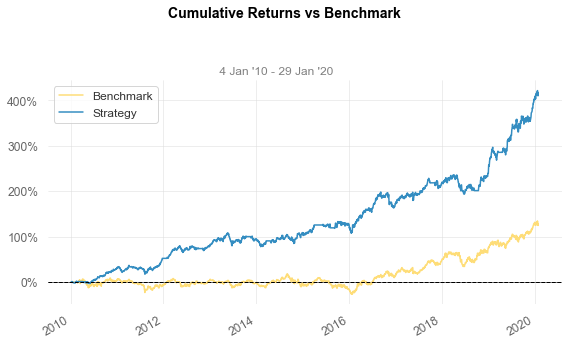

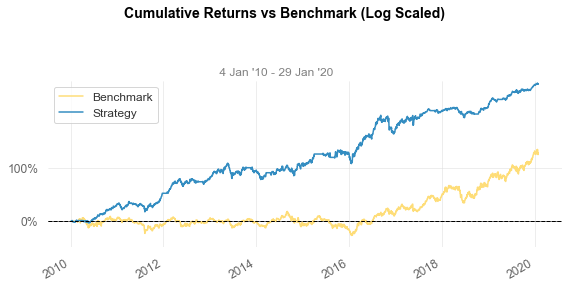

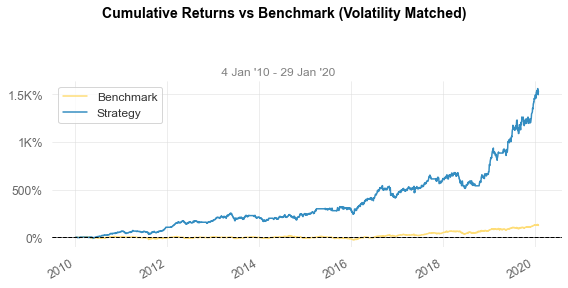

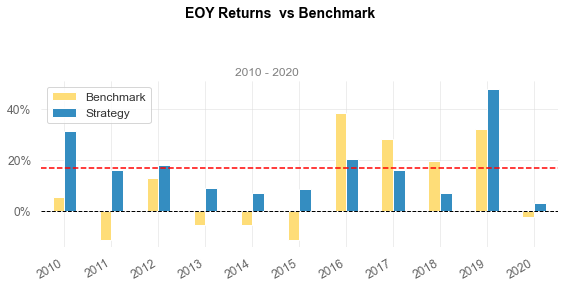

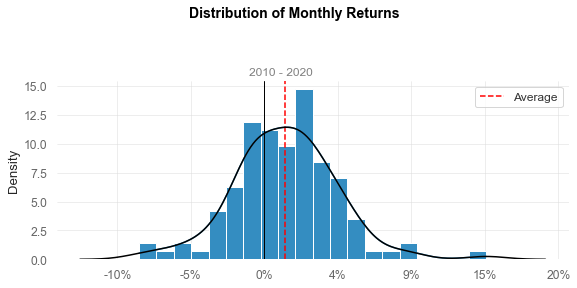

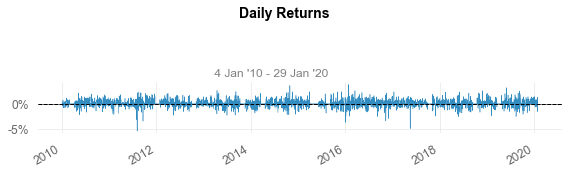

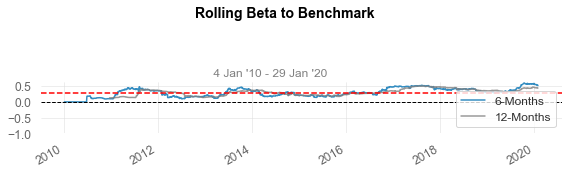

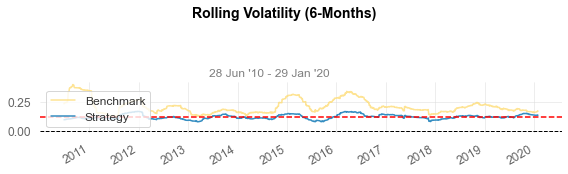

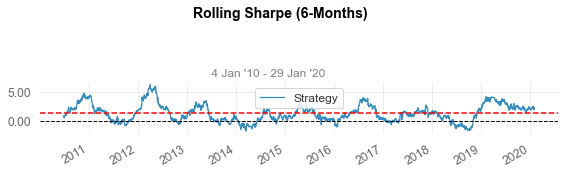

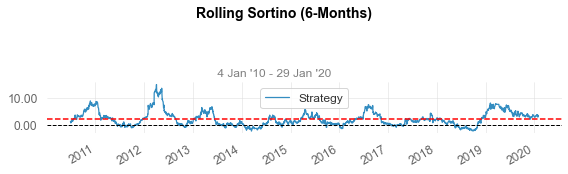

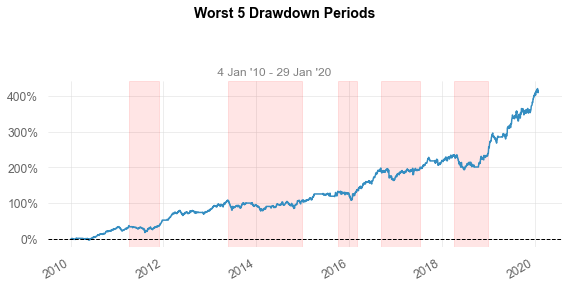

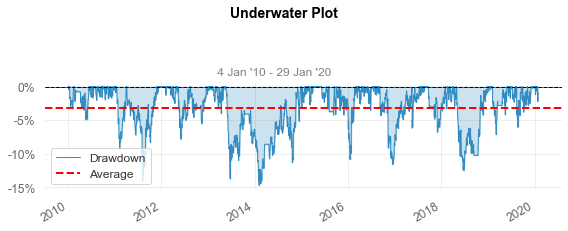

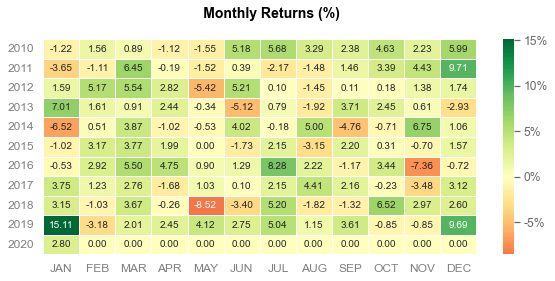

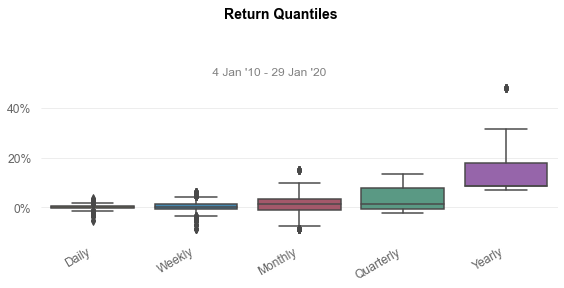

In [52]:
#quantstats apenas com low-vol
qs.reports.full(lowvol[0], b)

In [53]:
rendimentos.mean(axis=1).add(1).cumprod().to_frame()

0
Datas               
2010-01-04       NaN
2010-01-05  0.999739
2010-01-06  1.003115
2010-01-07  0.998850
2010-01-08  1.001575
...              ...
2020-01-23  5.212222
2020-01-24  5.178067
2020-01-27  5.096694
2020-01-28  5.160269
2020-01-29  5.154177

[2627 rows x 1 columns]

In [55]:
#testando a funçao union
hoje = date(2016, 5,1)
acoes_volatilidade = size(hoje)
top10 = acoes_volatilidade.sort_values(by = "Market cap").head(10).index
top10 = top10.union(["BLABLABLA"])
top10

Index(['BLABLABLA', 'EVEN3', 'GFSA3', 'GOLL4', 'MILS3', 'MYPK3', 'OIBR3',
       'PDGR3', 'RAPT4', 'SEER3', 'WIZS3'],
      dtype='object')

In [56]:
def size(dataFINAL):
    da = dataFINAL - pd.DateOffset(months=12)
    lv = Universo(df_ineg, dataFINAL)

    m = mktcap[(mktcap.Data>=pd.Timestamp(da))&(mktcap.Data<=pd.Timestamp(dataFINAL))] 
    m2 = mktcap[(mktcap.Data==pd.Timestamp(dataFINAL)-pd.DateOffset(days=0))]
    #pegar o ultimo dia que saiu o market cap
    data_loop = dataFINAL
    x_days = 1
    while m2.count()[0] == 0:
        m2 = mktcap[(mktcap.Data==pd.Timestamp(dataFINAL)-pd.DateOffset(days=x_days))]
        x_days+=1
        if m2.count()[0] == 1:
            break
    novo_lv = []

    for t in lv:
        b = t in m.columns
        if b == True:
            novo_lv.append(t)
    
    #vamos ordenar novo_lv
    for T in m2.columns:
        if T not in novo_lv:
            m2 = m2.drop(columns=[T])
        
    m2_transposto = m2.transpose()
    names = m2_transposto.columns.tolist()
    names[names.index(m2_transposto.columns[0])] = 'Market cap'
    m2_transposto.columns = names
    
    #mudar tipo de numero
    lista_mktcap = []
    for n in m2_transposto["Market cap"]:
        novo_n = ""
        for each in n:
            if each == ".":
                novo_n+=""
            elif each == ",":
                novo_n+="."
            else:
                novo_n+=each
        novo_n = float(novo_n)

        lista_mktcap.append(novo_n)
    m2_transposto["Market cap"] = lista_mktcap    
    
    return m2_transposto
def volatilidade(dataF):
    dataframe.Datas = pd.to_datetime(dataframe.Datas)
    data_analise = dataF - pd.DateOffset(months=12)

    p = dataframe[(dataframe.Datas>=pd.Timestamp(data_analise))&(dataframe.Datas<=pd.Timestamp(dataF))].count()  
    
    filtros_aplicados = dataframe[
                (dataframe.Datas>=pd.Timestamp(data_analise))&(dataframe.Datas<=pd.Timestamp(dataF))
            ]

    dtfr = pd.DataFrame(
        data={
            "sigma": filtros_aplicados.set_index('Datas').pct_change().std()
        }
    )
    
    universo = Universo(df_ineg, dataF)
    dtfr = dtfr.loc[universo,:]
    return dtfr

In [57]:
#backtest com pandemia de combination low vol e size

dataF=date(2022, 1, 1)
hoje = date(2010, 1, 1)
rendimentos = []

rendimentos = pd.DataFrame()

while hoje < dataF:
    hoje = hoje + pd.DateOffset(months=1)
    hoje = dia_existe(hoje, dataframe)
    
    
    acoes_volatilidade = volatilidade(hoje)
    top10 = acoes_volatilidade.sort_values(by = "sigma").iloc[0:10, :].index
    acoes_size = size(hoje)
    top10_2 = acoes_size.sort_values(by = "Market cap").head(5).index
    for acao in top10_2:
        top10 = top10.union([acao])
    
    # dataframe.set_index('Datas').loc[hoje - pd.DateOffset(months=1):hoje, top10].pct_change()
    
    rendimentos = pd.concat([rendimentos, dataframe.set_index('Datas').loc[dia_existe(hoje-pd.DateOffset(months=1), dataframe):dia_existe(hoje, dataframe), top10].pct_change()])
    #rendimentos = pd.concat([rendimentos, dataframe[(dataframe.Datas>=pd.Timestamp(hoje-pd.DateOffset(months=1)))&(dataframe.Datas<=pd.Timestamp(hoje))].loc[:,top10].pct_change()])
    
    print(hoje, top10)
        

    #print('======')
    
lowvol = rendimentos.mean(axis=1).add(1).cumprod().to_frame()

2010-02-02 00:00:00 Index(['BEEF3', 'BLUT4', 'CPFE3', 'CPLE6', 'EGIE3', 'ENBR3', 'GETI4', 'GVTT3',
       'LIGT3', 'PLAS3', 'PMAM3', 'RPMG3', 'TRPL4', 'UGPA4', 'VIVR3'],
      dtype='object')
2010-03-03 00:00:00 Index(['CPFE3', 'CPLE6', 'EGIE3', 'ENBR3', 'GETI4', 'GVTT3', 'HOOT4', 'KEPL3',
       'LIGT3', 'PLAS3', 'PSSA3', 'RPMG3', 'TRPL4', 'UGPA4', 'VIVR3'],
      dtype='object')
2010-04-04 00:00:00 Index([], dtype='object')
2010-05-05 00:00:00 Index(['CPFE3', 'CPLE6', 'ECOR3', 'EGIE3', 'ENBR3', 'GETI4', 'KEPL3', 'LAND3',
       'LIGT3', 'NEXP3', 'RPMG3', 'TRPL4', 'UGPA4', 'VIVR3', 'VIVT4'],
      dtype='object')
2010-06-06 00:00:00 Index(['AMBV4', 'CPFE3', 'CPLE6', 'EGIE3', 'ENBR3', 'EVEN3', 'GETI4', 'KEPL3',
       'LAND3', 'LIGT3', 'LUPA3', 'NEXP3', 'TRPL4', 'UGPA4', 'VIVT4'],
      dtype='object')
2010-07-07 00:00:00 Index(['CPFE3', 'CPLE6', 'EGIE3', 'ENBR3', 'EVEN3', 'GETI4', 'LAND3', 'LIGT3',
       'PMAM3', 'PSSA3', 'RPMG3', 'TELB4', 'TRPL4', 'UGPA4', 'VIVT4'],
      dtype='obj

2014-01-17 00:00:00 Index(['CIEL3', 'CPFE3', 'ECOR3', 'EGIE3', 'EQTL3', 'GFSA3', 'LOGN3', 'MULT3',
       'NEXP3', 'PRIO3', 'RSID3', 'TAEE11', 'UGPA3', 'VIVT4', 'VVAR11'],
      dtype='object')
2014-02-18 00:00:00 Index(['CIEL3', 'ECOR3', 'EGIE3', 'EQTL3', 'GFSA3', 'MDIA3', 'MGLU3', 'MULT3',
       'PRIO3', 'RSID3', 'TAEE11', 'TCSA3', 'UGPA3', 'VIVT4', 'WEGE3'],
      dtype='object')
2014-03-19 00:00:00 Index(['ABEV3', 'BRFS3', 'CIEL3', 'DIRR3', 'EGIE3', 'GFSA3', 'MDIA3', 'MGLU3',
       'MULT3', 'NEXP3', 'RSID3', 'TAEE11', 'UGPA3', 'VIVT4', 'WEGE3'],
      dtype='object')
2014-04-20 00:00:00 Index([], dtype='object')
2014-05-21 00:00:00 Index(['ABEV3', 'BRFS3', 'CIEL3', 'CTIP3', 'EGIE3', 'ENEV3', 'GFSA3', 'MULT3',
       'NEXP3', 'PCAR4', 'PRIO3', 'RSID3', 'TAEE11', 'UGPA3', 'WEGE3'],
      dtype='object')
2014-06-22 00:00:00 Index(['ABEV3', 'CIEL3', 'CTIP3', 'EGIE3', 'EVEN3', 'GFSA3', 'HYPE3', 'MGLU3',
       'MULT3', 'NEXP3', 'PCAR4', 'RSID3', 'TAEE11', 'UGPA3', 'WEGE3'],
      dtyp

2018-02-05 00:00:00 Index(['ABEV3', 'AESB3', 'ALUP11', 'EGIE3', 'ENAT3', 'EQTL3', 'GFSA3', 'IRBR3',
       'OIBR3', 'TRPL4', 'UGPA3', 'VIVT4', 'VLID3', 'WIZS3', 'ZAMP3'],
      dtype='object')
2018-03-06 00:00:00 Index(['ABEV3', 'AESB3', 'ALUP11', 'BEEF3', 'EGIE3', 'EQTL3', 'GFSA3', 'HYPE3',
       'IRBR3', 'OIBR3', 'RAPT4', 'TRPL4', 'UGPA3', 'VIVT4', 'WIZS3'],
      dtype='object')
2018-04-07 00:00:00 Index(['ABEV3', 'BEEF3', 'EGIE3', 'EQTL3', 'GFSA3', 'HYPE3', 'IRBR3', 'OIBR3',
       'SAPR11', 'SEER3', 'TAEE11', 'TEND3', 'TRPL4', 'UGPA3', 'VIVT4'],
      dtype='object')
2018-05-08 00:00:00 Index(['ABEV3', 'AESB3', 'EGIE3', 'ENAT3', 'EQTL3', 'GFSA3', 'IRBR3', 'OIBR3',
       'RAPT4', 'SAPR11', 'SEER3', 'TAEE11', 'TRPL4', 'UGPA3', 'VIVT4'],
      dtype='object')
2018-06-09 00:00:00 Index(['ABEV3', 'AESB3', 'ALUP11', 'BBSE3', 'BEEF3', 'EGIE3', 'EQTL3', 'LIGT3',
       'OIBR3', 'RAPT4', 'SEER3', 'SMTO3', 'TAEE11', 'TRPL4', 'VIVT4'],
      dtype='object')
2018-07-10 00:00:00 Index(['ABEV

2021-12-20 00:00:00 Index(['BBSE3', 'CASH3', 'CESP6', 'CPFE3', 'CVCB3', 'EGIE3', 'ENBR3', 'EZTC3',
       'ITSA4', 'LIGT3', 'NEOE3', 'QUAL3', 'TAEE11', 'TIMS3', 'VIVT3'],
      dtype='object')
2022-01-21 00:00:00 Index(['BBSE3', 'CASH3', 'CESP6', 'CPFE3', 'CVCB3', 'ENBR3', 'ENGI11', 'ETER3',
       'IGTI11', 'ITSA4', 'POSI3', 'PSSA3', 'TAEE11', 'TIMS3', 'VIVT3'],
      dtype='object')


In [58]:
#qs.reports.full(lowvol[0], b)
lowvol

0
Datas               
2010-01-04       NaN
2010-01-05  1.009275
2010-01-06  1.024300
2010-01-07  1.024682
2010-01-08  1.039972
...              ...
2022-01-17  4.944692
2022-01-18  4.909961
2022-01-19  5.010718
2022-01-20  5.114090
2022-01-21  5.110002

[3143 rows x 1 columns]

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2010-01-04  2010-01-04
End Period                 2022-01-21  2022-01-21
Risk-Free Rate             0.0%        0.0%
Time in Market             83.0%       77.0%

Cumulative Return          406.3%      115.9%
CAGR﹪                     14.4%       6.59%

Sharpe                     0.73        0.38
Prob. Sharpe Ratio         99.4%       90.73%
Smart Sharpe               0.71        0.37
Sortino                    1.04        0.53
Smart Sortino              1.01        0.52
Sortino/√2                 0.73        0.38
Smart Sortino/√2           0.72        0.37
Omega                      1.16        1.16

Max Drawdown               -47.94%     -47.56%
Longest DD Days            1470        1349
Volatility (ann.)          20.91%      24.1%
R^2                        0.32        0.32
Information Ratio          0.02        0.02
Calmar                     0.3         0

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2020-01-24  2020-03-23  2021-03-29   430    -47.937103        -44.329865
2  2013-01-24  2015-01-30  2017-02-02  1470    -36.562194        -35.390027
3  2021-06-24  2022-01-06  2022-01-21   211    -24.225597        -23.863957
4  2017-09-19  2018-06-27  2018-10-24   400    -19.775448        -19.200954
5  2011-07-20  2011-08-08  2012-02-14   209    -16.007496        -13.791942

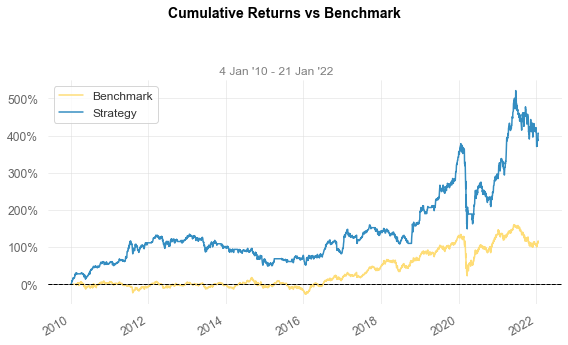

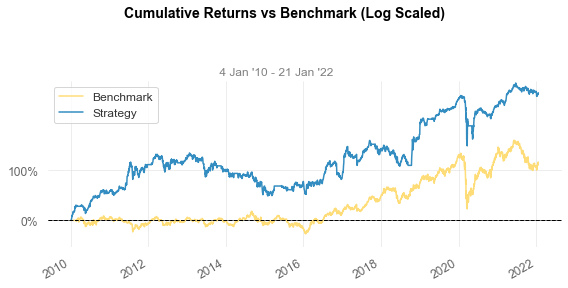

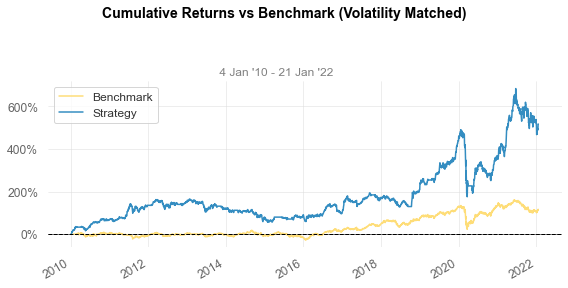

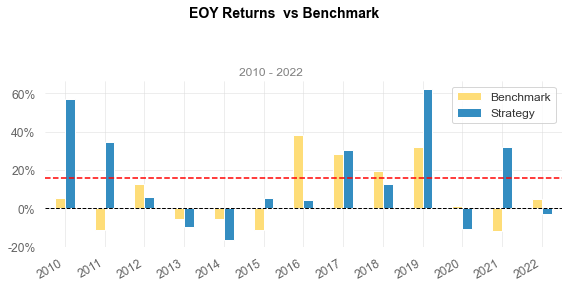

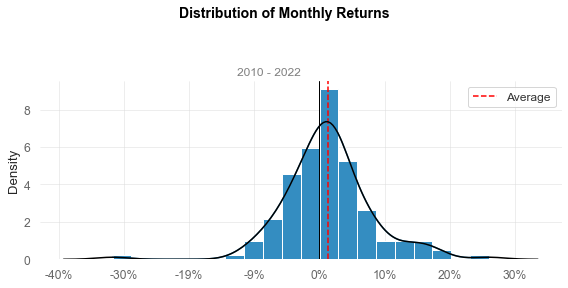

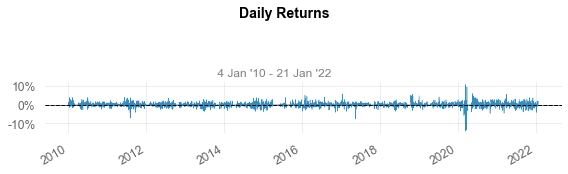

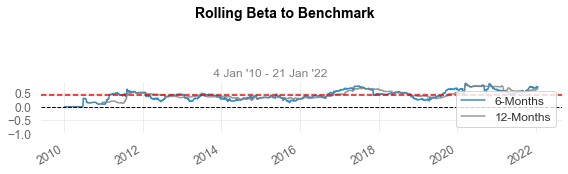

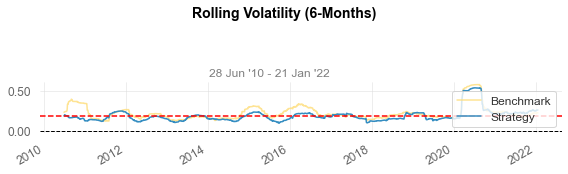

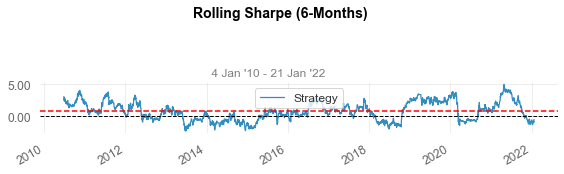

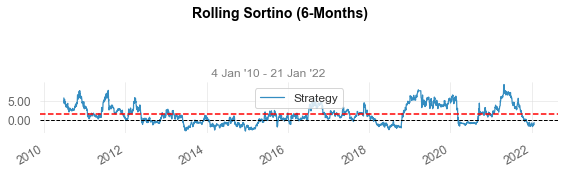

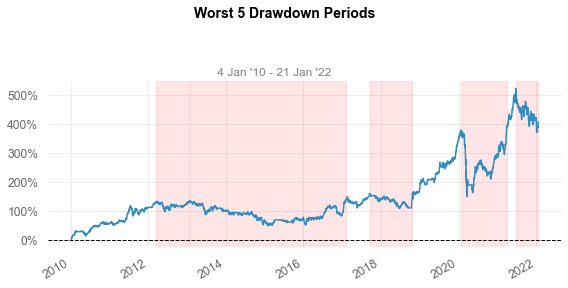

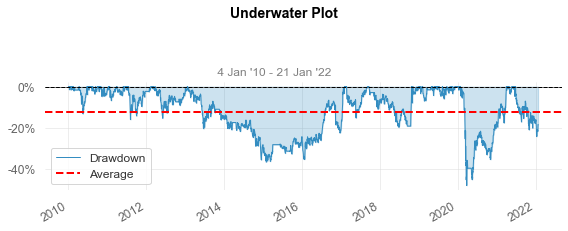

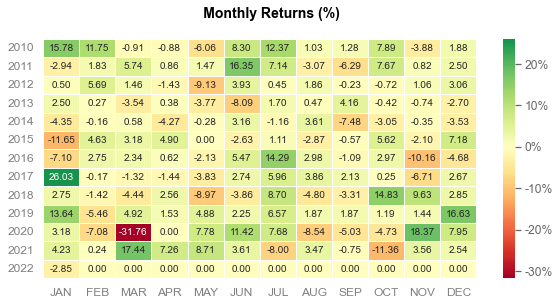

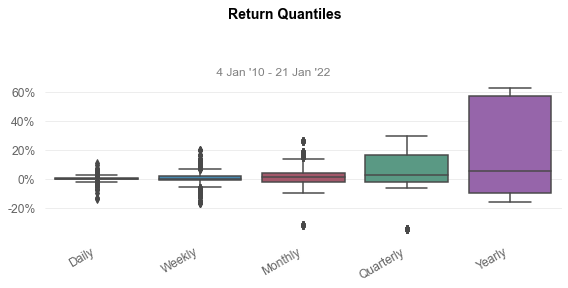

In [59]:
qs.reports.full(lowvol[0], b)

In [48]:
qs.reports.html(lowvol[0], b)